In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from datetime import datetime
import xarray as xr
import geopandas as gpd
import pyreadr


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_dir = '/Users/maoyabassiouni/Documents/DATA/Projects/OLNI'

### load data

In [5]:
df_tree = pd.read_csv(os.path.join(data_dir, 'raw', 'foliarNutrientsEnv', '4.1_dataset-NutEnvDep-nutrients_tree.csv'))
df_plot = pd.read_csv(os.path.join(data_dir, 'raw', 'foliarNutrientsEnv', '4.1_dataset-NutEnvDep-nutrients_plot.csv'))
df_trends = pd.read_csv(os.path.join(data_dir, 'raw', 'foliarNutrientsEnv', 'foliarNut-pred_trends.csv'))

In [6]:
dfR_icp = pyreadr.read_r(os.path.join(data_dir, 'raw', 'foliarNutrientsEnv_R', 'icp_trends.Rdata')) # ***
dfR_icp = pd.DataFrame(dfR_icp['icp.trends'])
dfR_plot = pyreadr.read_r(os.path.join(data_dir, 'raw', 'foliarNutrientsEnv_R', 'trens_plot.Rdata'))
dfR_plot = pd.DataFrame(dfR_plot['trends'])

In [7]:
dfR_icp

,year,country.plot,country,plot,species,survey_year,code_country,code_plot,code_tree_species,code_leaves_type,...,nSamples,lon,lat,map,mat,nox,nred,sdep,ndep,cdioxide
0,1990,3_1012,3,1012,51,1990.0,3.0,1012.0,51.0,NaN,...,NaN,5.636944,52.235556,709.8,10.700000,NaN,NaN,NaN,NaN,354.3475
1,1990,3_129,3,129,136,1990.0,3.0,129.0,136.0,NaN,...,NaN,5.816667,51.616667,662.0,10.858333,NaN,NaN,NaN,NaN,354.3475
2,1990,3_174,3,174,134,1990.0,3.0,174.0,134.0,NaN,...,NaN,5.517778,51.329167,634.2,11.133333,NaN,NaN,NaN,NaN,354.3475
3,1990,3_58,3,58,134,1990.0,3.0,58.0,134.0,NaN,...,NaN,6.343333,52.880278,769.1,10.375000,NaN,NaN,NaN,NaN,354.3475
4,1990,3_82,3,82,136,1990.0,3.0,82.0,136.0,NaN,...,NaN,6.726111,52.905833,705.6,10.225000,NaN,NaN,NaN,NaN,354.3475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6282,2016,4_906,4,906,118,2016.0,4.0,906.0,118.0,0.5,...,49.500000,11.917222,48.122500,697.9,9.758333,793.698547,1333.823547,293.576065,2127.522095,NaN
6283,2016,14_19,14,19,118,2016.0,14.0,19.0,118.0,0.5,...,13.000000,15.622236,48.524657,664.2,10.450000,533.133942,837.537170,287.626869,1370.671112,NaN
6284,2016,4_921,4,921,48,2016.0,4.0,921.0,48.0,0.0,...,49.000000,9.886667,49.731667,649.5,9.825000,668.504089,738.519348,259.353653,1407.023438,NaN
6285,2016,57_111,57,111,125,2016.0,57.0,111.0,125.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
list(dfR_icp.keys())

['year',
 'country.plot',
 'country',
 'plot',
 'species',
 'survey_year',
 'code_country',
 'code_plot',
 'code_tree_species',
 'code_leaves_type',
 'mass_100_leaves',
 'mass_1000_needles',
 'n',
 's',
 'p',
 'ca',
 'mg',
 'k',
 'na',
 'c',
 'zn',
 'mn',
 'fe',
 'cu',
 'pb',
 'cd',
 'b',
 'al',
 'country.plot.sp',
 'CPSYID',
 'code_sampler',
 'ca_c',
 'cl_c',
 'doc_c',
 'k_c',
 'mg_c',
 'n_nh4_c',
 'n_no3_c',
 'n_total_c',
 'na_c',
 'p_po4_c',
 's_so4_c',
 'ca_t',
 'cl_t',
 'doc_t',
 'k_t',
 'mg_t',
 'n_nh4_t',
 'n_no3_t',
 'n_total_t',
 'na_t',
 'p_po4_t',
 's_so4_t',
 'ca_q',
 'cl_q',
 'doc_q',
 'k_q',
 'mg_q',
 'n_nh4_q',
 'n_no3_q',
 'n_total_q',
 'na_q',
 'p_po4_q',
 's_so4_q',
 'quantity_dem',
 'quantity_dem_t',
 'pH',
 'CD_Pass',
 'CD_Fail',
 'CD_NA',
 'PD_Pass',
 'PD_Fail',
 'PD_NA',
 'N_Pass',
 'N_Fail',
 'N_NA',
 'nSamples',
 'lon',
 'lat',
 'map',
 'mat',
 'nox',
 'nred',
 'sdep',
 'ndep',
 'cdioxide']

### data variables

In [9]:
print('size: ', len(df_tree.index), 'n keys', len(df_tree.keys()),'\n')
print('keys\t\t%')
for k in df_tree.keys():
    l = len(df_tree[k].dropna().index)
    print(k, '\t%d' % (l / np.float(len(df_tree.index))*100))

size:  183927 n keys 22 

keys		%
code_country 	100
code_plot 	100
tf 	100
code_tree_species 	100
tree_number 	100
latitude 	100
longitude 	100
latID 	100
country_plot 	100
MAP 	100
MAT 	100
CO2 	100
Nox.total_dep 	100
Nred.total_dep 	100
Sox.total_dep 	100
n 	100
p 	100
k 	100
ca 	100
s 	100
mg 	100
np 	100


In [10]:
print('size: ', len(df_plot.index), 'n keys', len(df_plot.keys()),'\n')
print('keys\t\t%')
for k in df_plot.keys():
    l = len(df_plot[k].dropna().index)
    print(k,  '\t%d' % (l / np.float(len(df_plot.index))*100))

size:  1888 n keys 21 

keys		%
code_country 	100
code_plot 	100
tf 	100
code_tree_species 	100
latitude 	100
longitude 	100
latID 	100
country_plot 	100
MAP 	100
MAT 	100
CO2 	100
Nox.total_dep 	100
Nred.total_dep 	100
Sox.total_dep 	100
n 	100
p 	100
k 	100
ca 	100
s 	100
mg 	100
np 	100


In [11]:
print('size: ', len(df_trends.index), 'n keys', len(df_trends.keys()),'\n')
print('keys\t\t%')
for k in df_trends.keys():
    l = len(df_trends[k].dropna().index)
    print(k, '\t%d' % (l / np.float(len(df_trends.index))*100))

size:  49474 n keys 200 

keys		%
Unnamed: 0 	100
species 	99
code_country 	100
code_plot 	100
code_tree_species 	99
tree_number 	96
latitude 	85
longitude 	85
n_tf 	66
n_t0 	66
n_coef 	66
n_intercept 	66
n_p.valCoef 	66
n_n 	66
s_tf 	66
s_t0 	66
s_coef 	66
s_intercept 	66
s_p.valCoef 	66
s_n 	66
p_tf 	66
p_t0 	66
p_coef 	66
p_intercept 	66
p_p.valCoef 	66
p_n 	66
ca_tf 	66
ca_t0 	66
ca_coef 	66
ca_intercept 	66
ca_p.valCoef 	66
ca_n 	66
mg_tf 	66
mg_t0 	66
mg_coef 	66
mg_intercept 	66
mg_p.valCoef 	66
mg_n 	66
k_tf 	66
k_t0 	66
k_coef 	66
k_intercept 	66
k_p.valCoef 	66
k_n 	66
na_tf 	12
na_t0 	12
na_coef 	12
na_intercept 	12
na_p.valCoef 	11
na_n 	12
np_tf 	66
np_t0 	66
np_coef 	66
np_intercept 	66
np_p.valCoef 	66
np_n 	66
c_tf 	22
c_t0 	22
c_coef 	22
c_intercept 	22
c_p.valCoef 	22
c_n 	22
zn_tf 	44
zn_t0 	44
zn_coef 	44
zn_intercept 	44
zn_p.valCoef 	44
zn_n 	44
mn_tf 	46
mn_t0 	46
mn_coef 	46
mn_intercept 	46
mn_p.valCoef 	46
mn_n 	46
fe_tf 	45
fe_t0 	45
fe_coef 	45
fe_intercept 

In [12]:
print('size: ', len(dfR_icp.index), 'n keys', len(dfR_icp.keys()),'\n')
print('keys\t\t%')

for k in dfR_icp.keys():
    l = len(dfR_icp[k].dropna().index)
    print(k,  '\t%d' % (l / np.float(len(dfR_icp.index))*100))

size:  6287 n keys 86 

keys		%
year 	100
country.plot 	100
country 	100
plot 	100
species 	100
survey_year 	100
code_country 	100
code_plot 	100
code_tree_species 	100
code_leaves_type 	73
mass_100_leaves 	34
mass_1000_needles 	56
n 	99
s 	97
p 	99
ca 	99
mg 	99
k 	99
na 	18
c 	32
zn 	75
mn 	79
fe 	79
cu 	63
pb 	32
cd 	22
b 	28
al 	30
country.plot.sp 	100
CPSYID 	0
code_sampler 	58
ca_c 	58
cl_c 	58
doc_c 	16
k_c 	58
mg_c 	57
n_nh4_c 	58
n_no3_c 	58
n_total_c 	43
na_c 	58
p_po4_c 	19
s_so4_c 	58
ca_t 	58
cl_t 	58
doc_t 	41
k_t 	58
mg_t 	58
n_nh4_t 	58
n_no3_t 	58
n_total_t 	51
na_t 	58
p_po4_t 	43
s_so4_t 	58
ca_q 	58
cl_q 	58
doc_q 	16
k_q 	58
mg_q 	57
n_nh4_q 	58
n_no3_q 	58
n_total_q 	43
na_q 	58
p_po4_q 	19
s_so4_q 	58
quantity_dem 	58
quantity_dem_t 	58
pH 	53
CD_Pass 	57
CD_Fail 	57
CD_NA 	57
PD_Pass 	57
PD_Fail 	57
PD_NA 	57
N_Pass 	57
N_Fail 	57
N_NA 	57
nSamples 	57
lon 	95
lat 	95
map 	95
mat 	95
nox 	90
nred 	90
sdep 	90
ndep 	90
cdioxide 	98


In [13]:
print('size: ', len(dfR_plot.index), 'n keys', len(dfR_plot.keys()),'\n')
print('keys\t\t%')

for k in dfR_plot.keys():
    l = len(dfR_plot[k].dropna().index)
    print(k, '\t%d' % (l / np.float(len(dfR_plot.index))*100))

size:  6287 n keys 12 

keys		%
country 	100
plot 	100
country.plot 	100
nmean 	8
ntrend 	6
ptrend 	6
catrend 	0
strend 	0
ktrend 	0
mgtrend 	0
mattrend 	0
maptrend 	0


In [14]:
print('dfR_icp - country', 100 * np.sum(dfR_icp['country'].values == dfR_icp['code_country'].values) / np.float(len(dfR_icp.index)))
print('dfR_icp - plot', 100 * np.sum(dfR_icp['plot'].values == dfR_icp['code_plot'].values) / np.float(len(dfR_icp.index)))
print('dfR_icp - species', 100 * np.sum(dfR_icp['species'].values == dfR_icp['code_tree_species'].values) / np.float(len(dfR_icp.index)))

dfR_icp - country 100.0
dfR_icp - plot 100.0
dfR_icp - species 100.0


### How many lat/lon - plot - plot-country pairs in data?

528 plots in 28 countries selected in Peñuelas et al (2020)

more data here - not all country-plot-sp have lat/lon

In [15]:
print('n countries')
print('df_tree', len(df_tree.groupby(['code_country', ]).count().index))
print('df_plot', len(df_plot.groupby(['code_country', ]).count().index))
print('df_trends', len(df_trends.groupby(['code_country', ]).count().index))
print('dfR_icp', len(dfR_icp.groupby(['code_country', ]).count().index))
print('dfR_plot', len(dfR_plot.groupby(['country', ]).count().index))

n countries
df_tree 18
df_plot 18
df_trends 31
dfR_icp 31
dfR_plot 31


In [16]:
print('n lat/lon')
print('df_tree', len(df_tree.groupby(['latitude', 'longitude']).count().index))
print('df_plot', len(df_plot.groupby(['latitude', 'longitude']).count().index))
print('df_trends', len(df_trends.groupby(['latitude', 'longitude']).count().index))
print('dfR_icp', len(dfR_icp.groupby(['lat', 'lon']).count().index))

n lat/lon
df_tree 314
df_plot 314
df_trends 387
dfR_icp 903


In [17]:
print('n plots')
print('df_tree', len(df_tree.groupby(['country_plot', ]).count().index))
print('df_plot', len(df_plot.groupby(['country_plot', ]).count().index))
print('df_trends', len(df_trends.groupby(['code_country', 'code_plot']).count().index))
print('dfR_icp', len(dfR_icp.groupby(['country.plot', ]).count().index))

n plots
df_tree 314
df_plot 314
df_trends 1048
dfR_icp 1057


In [18]:
print('n plots.sp')
print('df_tree', len(df_tree.groupby(['country_plot', 'code_tree_species']).count().index))
print('df_plot', len(df_plot.groupby(['country_plot', 'code_tree_species']).count().index))
print('df_trends', len(df_trends.groupby(['code_country', 'code_plot', 'code_tree_species']).count().index))
print('dfR_icp', len(dfR_icp.groupby(['country.plot.sp', ]).count().index))

n plots.sp
df_tree 331
df_plot 331
df_trends 1128
dfR_icp 1145


### How many species?

unknown species code: 39; 68 ; 99; 122;  NANs 
code 2 -> only in df_R1

In [19]:
print('n species')
print('df_tree', len(df_tree.groupby(['code_tree_species',]).count().index))
print('df_plot', len(df_plot.groupby(['code_tree_species']).count().index))
print('df_trends', len(df_trends.groupby(['code_tree_species']).count().index))
print('dfR_icp', len(dfR_icp.groupby(['code_tree_species', ]).count().index))

n species
df_tree 30
df_plot 30
df_trends 48
dfR_icp 49


In [20]:
print(len(df_trends.groupby(['species', 'code_tree_species']).count()['n_n'].index))
df_trends.groupby(['species', 'code_tree_species']).count()['n_n']

48


species                                             code_tree_species
122                                                 122.0                  31
39                                                  39.0                    0
68                                                  68.0                    1
99                                                  99.0                    2
Abies alba                                          100.0                1019
Abies borisii-regis                                 101.0                  90
Alnus glutinosa                                     7.0                     1
Betula pendula                                      10.0                    2
Carpinus betulus                                    13.0                    3
Castanea sativa (C. vesca)                          15.0                    1
Erica arborea                                       77.0                   48
Eucalyptus sp.                                      17.0                

In [21]:
print(len(dfR_icp.groupby(['code_tree_species']).count()['species']))
dfR_icp.groupby(['code_tree_species']).count()['species']

49


code_tree_species
2.0         2
7.0         8
10.0        6
13.0       18
15.0        2
17.0       19
18.0       12
20.0     1092
21.0        8
22.0       18
32.0        3
33.0        1
36.0        1
39.0        1
41.0       55
43.0       18
44.0       20
46.0      153
48.0      470
49.0       14
50.0       29
51.0      412
52.0        6
54.0       36
56.0        1
68.0        3
77.0        9
98.0       19
99.0       13
100.0     244
101.0      11
112.0       8
115.0       8
116.0      26
118.0    1663
120.0      64
121.0      12
122.0       9
123.0       9
124.0      20
125.0      43
129.0      83
130.0     118
131.0      24
132.0       8
134.0    1316
135.0      16
136.0     148
199.0       8
Name: species, dtype: int64

### Period of record

In [22]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

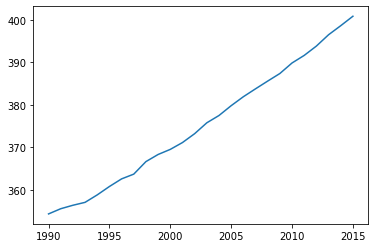

In [23]:
df_c = dfR_icp.groupby('year').mean()
plt.plot(df_c['cdioxide'])

In [24]:
#select locations where ymin<

dfR_icp n: 1004


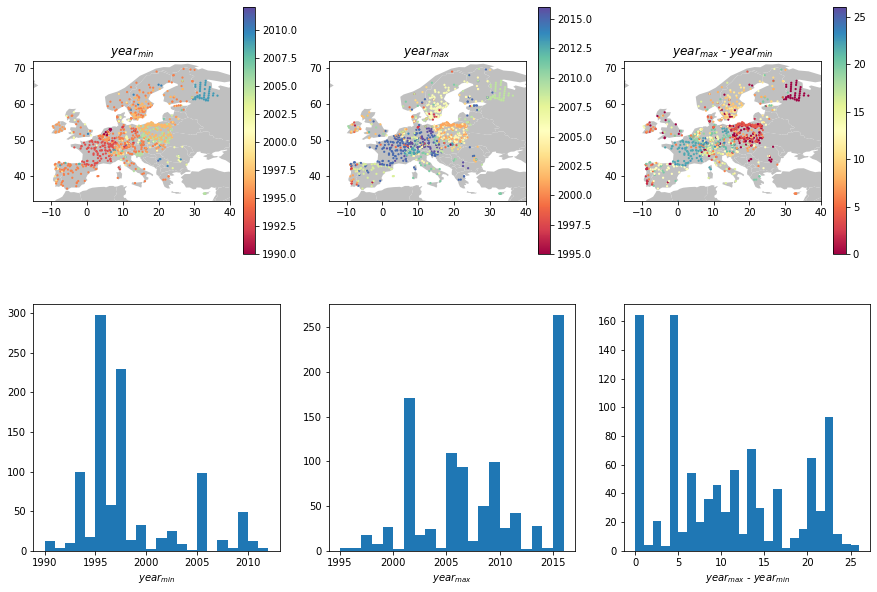

In [25]:
lat = dfR_icp.groupby(['lat', 'lon', 'code_tree_species']).count().index.get_level_values('lat')
lon = dfR_icp.groupby(['lat', 'lon', 'code_tree_species']).count().index.get_level_values('lon')
ymin = dfR_icp.groupby(['lat', 'lon', 'code_tree_species']).min()['year']
ymax = dfR_icp.groupby(['lat', 'lon', 'code_tree_species']).max()['year']

print('dfR_icp n:', len(ymax))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2, 3, 1)
world.plot(zorder=1, color='silver', ax=ax)
cb = ax.scatter(lon, lat, c = ymin, edgecolor='none', s=5,  cmap='Spectral')
ax.set_ylim([33, 72])
ax.set_xlim([-15, 40])
ax.set_title('$year_{min}$')
plt.colorbar(cb)

ax = fig.add_subplot(2, 3, 2)
world.plot(zorder=1, color='silver', ax=ax)
cb = ax.scatter(lon, lat, c = ymax, edgecolor='none', s=5,  cmap='Spectral')
ax.set_ylim([33, 72])
ax.set_xlim([-15, 40])
ax.set_title('$year_{max}$')
plt.colorbar(cb)

ax = fig.add_subplot(2, 3, 3)
world.plot(zorder=1, color='silver', ax=ax)
cb = ax.scatter(lon, lat, c = ymax-ymin, edgecolor='none', s=5,  cmap='Spectral')
ax.set_ylim([33, 72])
ax.set_xlim([-15, 40])
ax.set_title('$year_{max}$ - $year_{min}$')
plt.colorbar(cb)

ax = fig.add_subplot(2, 3, 4)
ax.hist(ymin,  bins=np.linspace(np.min(ymin), np.max(ymin), np.max(ymin)-np.min(ymin)+1))
ax.set_xlabel('$year_{min}$')
ax = fig.add_subplot(2, 3, 5)
ax.hist(ymax, bins=np.linspace(np.min(ymax), np.max(ymax), np.max(ymax)-np.min(ymax)+1))
ax.set_xlabel('$year_{max}$')
ax = fig.add_subplot(2, 3, 6)
ax.hist(ymax-ymin, bins=np.linspace(0, np.max(ymax-ymin), np.max(ymax)-np.min(ymin)+1))
ax.set_xlabel('$year_{max}$ - $year_{min}$')
#plt.savefig('../data.jpg')
plt.show()

df_plot n: 331


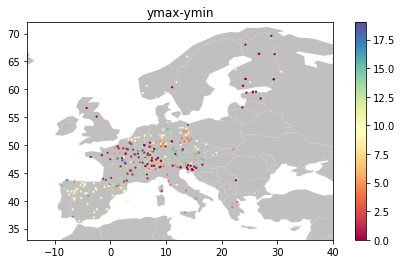

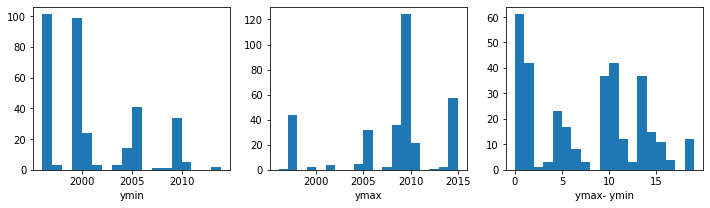

In [26]:
lat = df_plot.groupby(['latitude', 'longitude', 'code_tree_species']).count().index.get_level_values('latitude')
lon = df_plot.groupby(['latitude', 'longitude', 'code_tree_species']).count().index.get_level_values('longitude')
ymin = df_plot.groupby(['latitude', 'longitude', 'code_tree_species']).min()['tf']
ymax = df_plot.groupby(['latitude', 'longitude', 'code_tree_species']).max()['tf']

print('df_plot n:', len(ymax))
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
world.plot(zorder=1, color='silver', ax=ax)
cb = ax.scatter(lon, lat, c = ymax-ymin, edgecolor='none', s=5,  cmap='Spectral')
ax.set_ylim([33, 72])
ax.set_xlim([-15, 40])
ax.set_title('ymax-ymin')
plt.colorbar(cb)
plt.show()

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1, 3, 1)
ax.hist(ymin,  bins=np.linspace(np.min(ymin), np.max(ymin), np.max(ymin)-np.min(ymin)+1))
ax.set_xlabel('ymin')
ax = fig.add_subplot(1, 3, 2)
ax.hist(ymax, bins=np.linspace(np.min(ymax), np.max(ymax), np.max(ymax)-np.min(ymax)+1))
ax.set_xlabel('ymax')
ax = fig.add_subplot(1, 3, 3)
ax.hist(ymax-ymin, bins=np.linspace(0, np.max(ymax-ymin), np.max(ymax)-np.min(ymin)+1))
ax.set_xlabel('ymax- ymin')
plt.show()

df_tree n: 39616


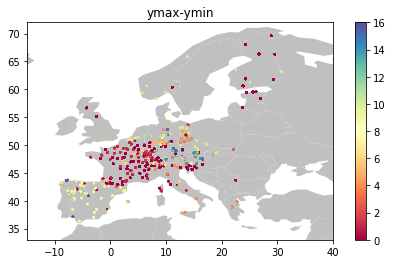

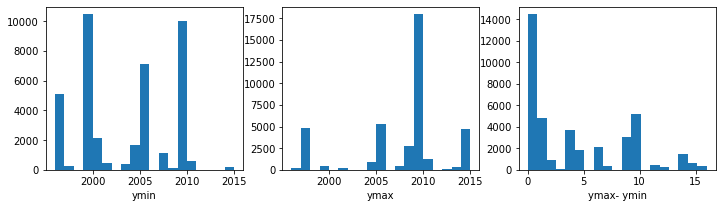

In [27]:
lat = df_tree.groupby(['latitude', 'longitude', 'code_tree_species', 'tree_number']).count().index.get_level_values('latitude')
lon = df_tree.groupby(['latitude', 'longitude', 'code_tree_species', 'tree_number']).count().index.get_level_values('longitude')
ymin = df_tree.groupby(['latitude', 'longitude', 'code_tree_species', 'tree_number']).min()['tf']
ymax = df_tree.groupby(['latitude', 'longitude', 'code_tree_species', 'tree_number']).max()['tf']
print('df_tree n:', len(ymax))

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
world.plot(zorder=1, color='silver', ax=ax)
cb = ax.scatter(lon, lat, c = ymax-ymin, edgecolor='none', s=5,  cmap='Spectral')
ax.set_ylim([33, 72])
ax.set_xlim([-15, 40])
ax.set_title('ymax-ymin')
plt.colorbar(cb)
plt.show()

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1, 3, 1)
ax.hist(ymin,  bins=np.linspace(np.min(ymin), np.max(ymin), np.max(ymin)-np.min(ymin)+1))
ax.set_xlabel('ymin')
ax = fig.add_subplot(1, 3, 2)
ax.hist(ymax, bins=np.linspace(np.min(ymax), np.max(ymax), np.max(ymax)-np.min(ymax)+1))
ax.set_xlabel('ymax')
ax = fig.add_subplot(1, 3, 3)
ax.hist(ymax-ymin, bins=np.linspace(0, np.max(ymax-ymin), np.max(ymax)-np.min(ymin)+1))
ax.set_xlabel('ymax- ymin')
plt.show()

## Site selection

df_grouped n:  996


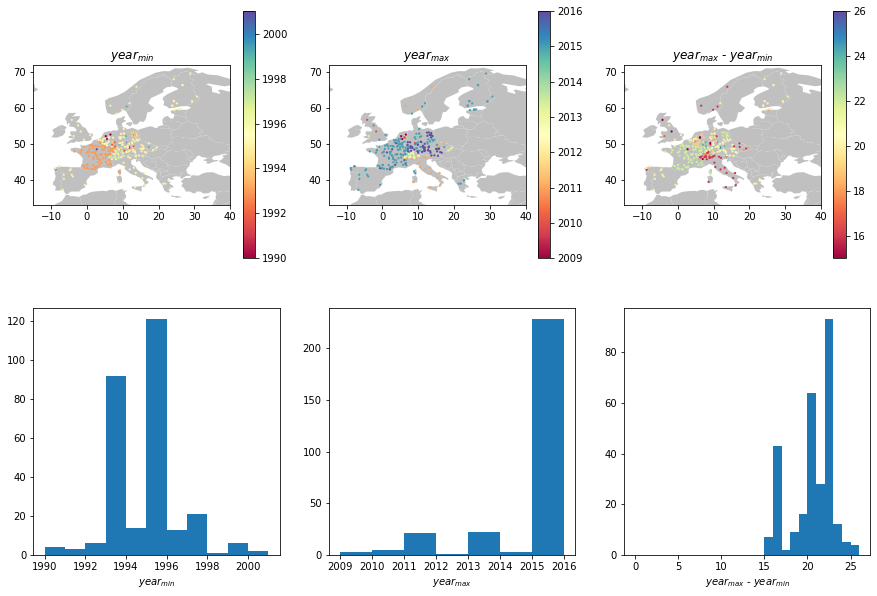

In [28]:
dfR_icp_x = dfR_icp[['lat', 'lon', 'year', 'code_tree_species', 'n']].dropna()
df_group = dfR_icp_x.groupby(['lat', 'lon', 'code_tree_species'])

lat = df_group.count().index.get_level_values('lat')
lon = df_group.count().index.get_level_values('lon')
ymin = df_group.min()['year']
ymax = df_group.max()['year']
print('df_grouped n: ', len(ymax))

sel_locs = [[lati, loni, ymaxi, ymini] for lati, loni, ymaxi, ymini in zip(lat, lon, ymax, ymin) if (ymaxi - ymini)>=15]

lat, lon, ymax, ymin = zip(*sel_locs)
yrange = np.array(ymax) - np.array(ymin)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2, 3, 1)
world.plot(zorder=1, color='silver', ax=ax)
cb = ax.scatter(lon, lat, c = ymin, edgecolor='none', s=5,  cmap='Spectral')
ax.set_ylim([33, 72])
ax.set_xlim([-15, 40])
ax.set_title('$year_{min}$')
plt.colorbar(cb)

ax = fig.add_subplot(2, 3, 2)
world.plot(zorder=1, color='silver', ax=ax)
cb = ax.scatter(lon, lat, c = ymax, edgecolor='none', s=5,  cmap='Spectral')
ax.set_ylim([33, 72])
ax.set_xlim([-15, 40])
ax.set_title('$year_{max}$')
plt.colorbar(cb)

ax = fig.add_subplot(2, 3, 3)
world.plot(zorder=1, color='silver', ax=ax)
cb = ax.scatter(lon, lat, c = yrange, edgecolor='none', s=5,  cmap='Spectral')
ax.set_ylim([33, 72])
ax.set_xlim([-15, 40])
ax.set_title('$year_{max}$ - $year_{min}$')
plt.colorbar(cb)

ax = fig.add_subplot(2, 3, 4)
ax.hist(ymin,  bins=np.linspace(np.min(ymin), np.max(ymin), np.max(ymin)-np.min(ymin)+1))
ax.set_xlabel('$year_{min}$')
ax = fig.add_subplot(2, 3, 5)
ax.hist(ymax, bins=np.linspace(np.min(ymax), np.max(ymax), np.max(ymax)-np.min(ymax)+1))
ax.set_xlabel('$year_{max}$')
ax = fig.add_subplot(2, 3, 6)
ax.hist(yrange, bins=np.linspace(0, np.max(yrange), np.max(ymax)-np.min(ymin)+1))
ax.set_xlabel('$year_{max}$ - $year_{min}$')
#plt.savefig('../data.jpg')
plt.show()

In [29]:
df_group_m = df_group.mean()
df_group_m['ymin'] = df_group.min()['year']
df_group_m['ymax'] = df_group.max()['year']
df_group_m['count'] = df_group.count()['year']
df_group_m['yrange'] = df_group_m['ymax'] - df_group_m['ymin']

In [30]:
df_group_m

year          n  ymin  ymax  count  \
lat       lon       code_tree_species                                         
34.929444 32.931111 121.0              2008.0   9.772500  2005  2011      4   
                    129.0              2008.0   8.696250  2005  2011      4   
34.952222 32.830556 129.0              2008.0   7.951250  2005  2011      4   
35.013889 33.050000 121.0              2008.0  11.116250  2005  2011      4   
35.020000 32.627500 121.0              2008.0   9.713750  2005  2011      4   
...                                       ...        ...   ...   ...    ...   
67.999444 24.236111 118.0              2005.0   9.700758  1995  2015     11   
68.995278 19.427500 118.0              1997.0  12.715000  1995  1999      3   
69.454167 30.036111 134.0              1999.0  11.912000  1995  2003      5   
69.583056 28.898056 134.0              2005.0  12.803636  1995  2015     11   
69.738889 26.958056 134.0              2002.0  11.593125  1995  2009      8   

                                       yrange  
lat       lon       code_tree_species          
34.929444 32.931111 121.0                   6  
                    129.0                   6  
34.952222 32.830556 129.0                   6  
35.013889 33.050000 121.0                   6  
35.020000 32.627500 121.0                   6  
...                                       ...  
67.999444 24.236111 118.0                  20  
68.995278 19.427500 118.0                   4  
69.454167 30.036111 134.0                   8  
69.583056 28.898056 134.0                  20  
69.738889 26.958056 134.0                  14  

[996 rows x 6 columns]

In [31]:
print('max year range, count, ymax')
np.max(df_group_m['yrange']), np.max(df_group_m['count']), np.max(df_group_m['ymax'])

max year range, count, ymax


(26, 26, 2016)

Text(0.5, 1.0, 'count')

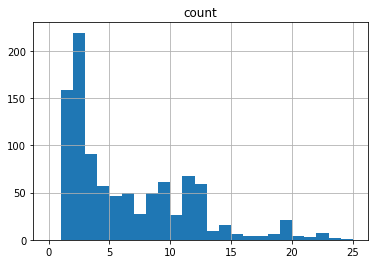

In [32]:
df_group_m['count'].hist(bins=np.linspace(0, 25, 26))
plt.title('count')

In [145]:
df_group_m.to_csv(os.path.join(data_dir, 'sites', 'all_icp_sites.csv'))

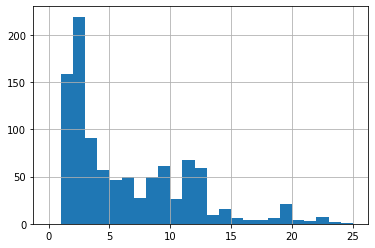

In [147]:
df_group_m['count'].hist(bins=np.linspace(0, 25, 26))
plt.show()

In [152]:
df_group_m_sel

,,,ymin,ymax,yrange,count
lat,lon,code_tree_species,,,,
36.370556,-5.578333,54.0,1995,2008,13,9
37.031389,-3.015000,46.0,1995,2008,13,9
37.155278,-6.732500,131.0,1995,2015,20,12
37.901667,-2.898611,129.0,1995,2008,13,8
37.908889,13.404167,41.0,1995,2011,16,9
...,...,...,...,...,...,...
67.335556,26.648889,134.0,1995,2005,10,6
67.950278,24.057222,134.0,1995,2009,14,8
67.999444,24.236111,118.0,1995,2015,20,11


sel_icp_sites c5 r15: 283


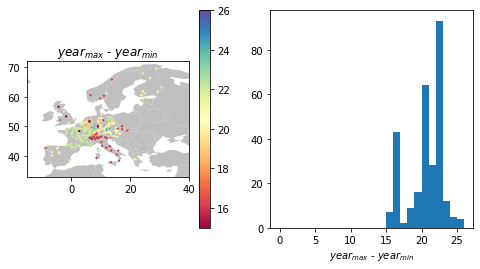

sel_icp_sites c5 r10: 434


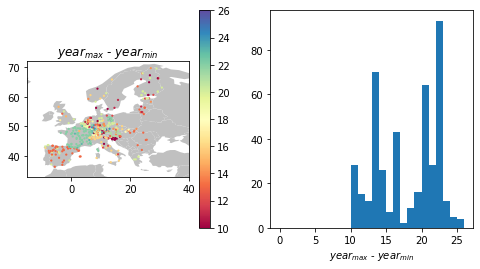

sel_icp_sites c3 r15: 283


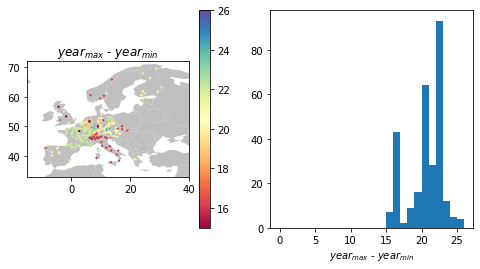

sel_icp_sites c3 r20: 206


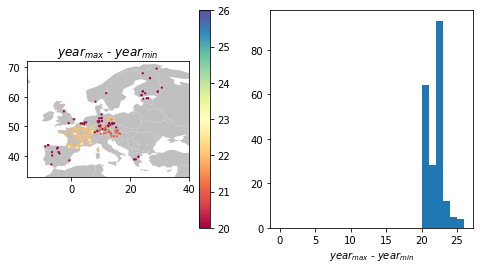

sel_icp_sites c5 r10: 434


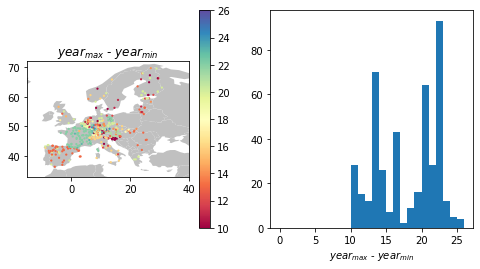

In [158]:
for count_nmin, range_min in [[5, 15],
                              [5, 10],
                              [3, 15],
                              [3, 20],
                              [5, 10],
                             ]:
    df_group_m_sel = df_group_m[(df_group_m['yrange']>=range_min)
                               & (df_group_m['count']>=count_nmin)][['ymin', 'ymax', 'yrange', 'count']]
    df_group_m_sel.to_csv(os.path.join(data_dir, 'sites', 'sel_icp_sites_c%d_r%d.csv' % (count_nmin, range_min)))
    
    sel_locs = list(df_group_m_sel.index)
    print('sel_icp_sites c%d r%d: %s' % (count_nmin, range_min, len(sel_locs)))
        
    lat, lon, code = zip(*sel_locs)
    ymax = df_group_m_sel['ymax']
    ymin = df_group_m_sel['ymin']
    count = df_group_m_sel['count']
    yrange = np.array(ymax) - np.array(ymin)

    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(1, 2, 1)

    world.plot(zorder=1, color='silver', ax=ax)
    cb = ax.scatter(lon, lat, c = yrange, edgecolor='none', s=5,  cmap='Spectral')
    ax.set_ylim([33, 72])
    ax.set_xlim([-15, 40])
    ax.set_title('$year_{max}$ - $year_{min}$')
    plt.colorbar(cb)

    ax = fig.add_subplot(1, 2, 2)
    ax.hist(yrange, bins=np.linspace(0, np.max(yrange), np.max(ymax)-np.min(ymin)+1))
    ax.set_xlabel('$year_{max}$ - $year_{min}$')
    #plt.savefig('../data.jpg')
    plt.show()

In [ ]:
count_nmin = 5
range_min = 15

df_group all 996
df_group sel 283


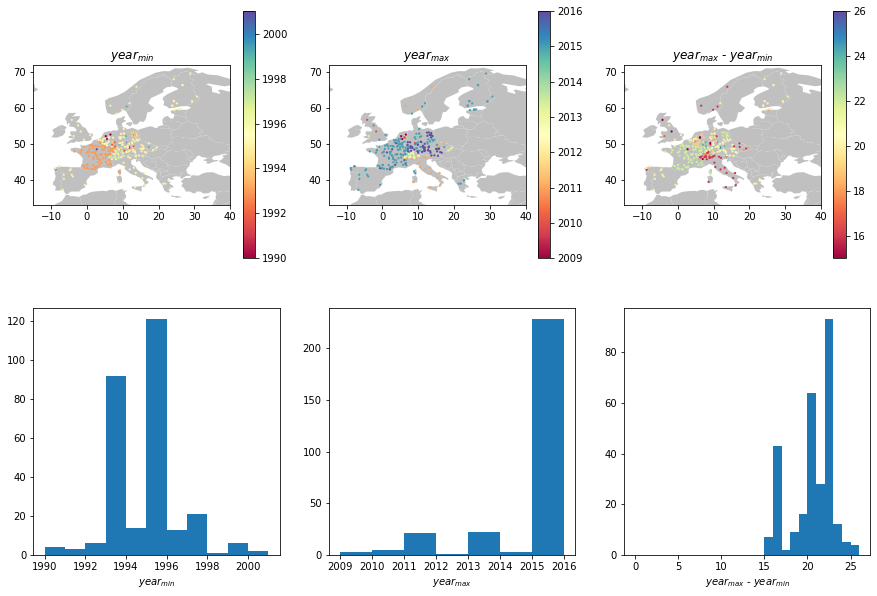

In [144]:
dfR_icp_x = dfR_icp[['lat', 'lon', 'year', 'code_tree_species', 'n']].dropna()
df_group = dfR_icp_x.groupby(['lat', 'lon', 'code_tree_species'])

lat = df_group.count().index.get_level_values('lat')
lon = df_group.count().index.get_level_values('lon')
ymin = df_group.min()['year']
ymax = df_group.max()['year']
count = df_group.count()['year']
print('df_group all', len(ymax))

sel_locs = [[lati, loni, ymaxi, ymini, counti] for lati, loni, ymaxi, ymini, counti 
                                                in zip(lat, lon, ymax, ymin, count) 
                                                if (counti >= count_nmin)
                                                   and (ymaxi - ymini) >= range_min]
print('df_group sel', len(sel_locs))
lat, lon, ymax, ymin, count = zip(*sel_locs)
yrange = np.array(ymax) - np.array(ymin)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2, 3, 1)
world.plot(zorder=1, color='silver', ax=ax)
cb = ax.scatter(lon, lat, c = ymin, edgecolor='none', s=5,  cmap='Spectral')
ax.set_ylim([33, 72])
ax.set_xlim([-15, 40])
ax.set_title('$year_{min}$')
plt.colorbar(cb)

ax = fig.add_subplot(2, 3, 2)
world.plot(zorder=1, color='silver', ax=ax)
cb = ax.scatter(lon, lat, c = ymax, edgecolor='none', s=5,  cmap='Spectral')
ax.set_ylim([33, 72])
ax.set_xlim([-15, 40])
ax.set_title('$year_{max}$')
plt.colorbar(cb)

ax = fig.add_subplot(2, 3, 3)
world.plot(zorder=1, color='silver', ax=ax)
cb = ax.scatter(lon, lat, c = yrange, edgecolor='none', s=5,  cmap='Spectral')
ax.set_ylim([33, 72])
ax.set_xlim([-15, 40])
ax.set_title('$year_{max}$ - $year_{min}$')
plt.colorbar(cb)

ax = fig.add_subplot(2, 3, 4)
ax.hist(ymin,  bins=np.linspace(np.min(ymin), np.max(ymin), np.max(ymin)-np.min(ymin)+1))
ax.set_xlabel('$year_{min}$')
ax = fig.add_subplot(2, 3, 5)
ax.hist(ymax, bins=np.linspace(np.min(ymax), np.max(ymax), np.max(ymax)-np.min(ymax)+1))
ax.set_xlabel('$year_{max}$')
ax = fig.add_subplot(2, 3, 6)
ax.hist(yrange, bins=np.linspace(0, np.max(yrange), np.max(ymax)-np.min(ymin)+1))
ax.set_xlabel('$year_{max}$ - $year_{min}$')
#plt.savefig('../data.jpg')
plt.show()